# Exploratory Data Analysis 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Input data files are available in the read-only "../data/" directory

# Load the train data
train_values_file_path = '../data/train-set-values.csv'
train_values = pd.read_csv(train_values_file_path)
X = train_values.copy()

train_labels_file_path = '../data/train-set-labels.csv'
train_labels = pd.read_csv(train_labels_file_path)
y = train_labels.copy()

X_y = pd.concat([X.set_index('id'),y.set_index('id')], axis=1, join='inner').reset_index()

# Load the test data
test_file_path = '../data/test-set-values.csv'
test_values = pd.read_csv(test_file_path)
X_test = test_values.copy()

In [2]:
# set seaborn color palatte
palette=["C2", "C1", "C0"]
customPalette = sns.set_palette(sns.color_palette(palette))

## Explore Target Class Distribution

In [3]:
y.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


<AxesSubplot:xlabel='status_group', ylabel='count'>

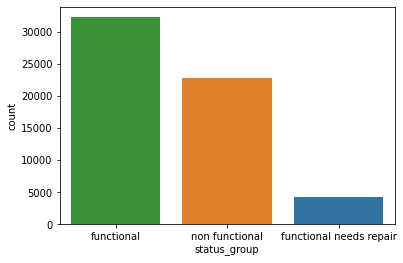

In [4]:
sns.countplot(x="status_group", data=y)

In the training data, the data belonging to the category `functional needs repair` are much less comparative to other 2 target categories. i.e. a clear cut target class imbalance is observed. This needs to be taken into account in later stages.

## Explore Training Data

In [5]:
X.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


### Inspect numerical columns

In [6]:
X.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


### Inspect categorical columns

In [7]:
X.describe(include=[object]).T

,count,unique,top,freq
date_recorded,59400,356,2011-03-15,572
funder,55765,1897,Government Of Tanzania,9084
installer,55745,2145,DWE,17402
wpt_name,59400,37400,none,3563
basin,59400,9,Lake Victoria,10248
subvillage,59029,19287,Madukani,508
region,59400,21,Iringa,5294
lga,59400,125,Njombe,2503
ward,59400,2092,Igosi,307
public_meeting,56066,2,True,51011


### Identify Missing Values

<AxesSubplot:>

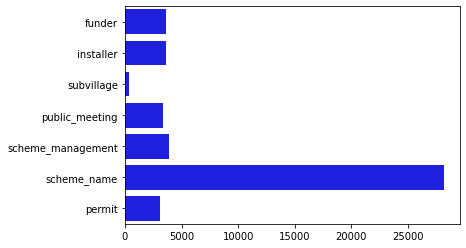

In [8]:
missing_vals=X.isnull().sum()
missing_vals=missing_vals[missing_vals > 0]
sns.barplot(x=missing_vals.values, y=missing_vals.index, color='b')

There are 7 categorical columns with missing values. Almost 50% of the values are missing from `scheme_name`.

In addition, from the numerical columns `amount_tsh`, `num_private`, `population`, and `construction_year` have more than 25% of the values as 0. (This can be observed from the fact that for all these columns, the min value and the 25th percentile are both 0). It is highly likely that these are recorded as 0 because the actual values are missing. 

### Identify Mostly Unique Columns

Based on column header names and description, the following columns can be identified as unique columns.
- `id`
- `wpt_name`
- `num_private`

In addition, based on inspection on categorical columns, following column can also be identified as mostly unique.
- `subvillage`

### Features with Promising Prospects

#### `construction_year`

Intuitively, we can think that a pump is more likely to fail when its old. Following plot shows that this intuitive understanding is valid. 

<AxesSubplot:xlabel='count', ylabel='construction_year'>

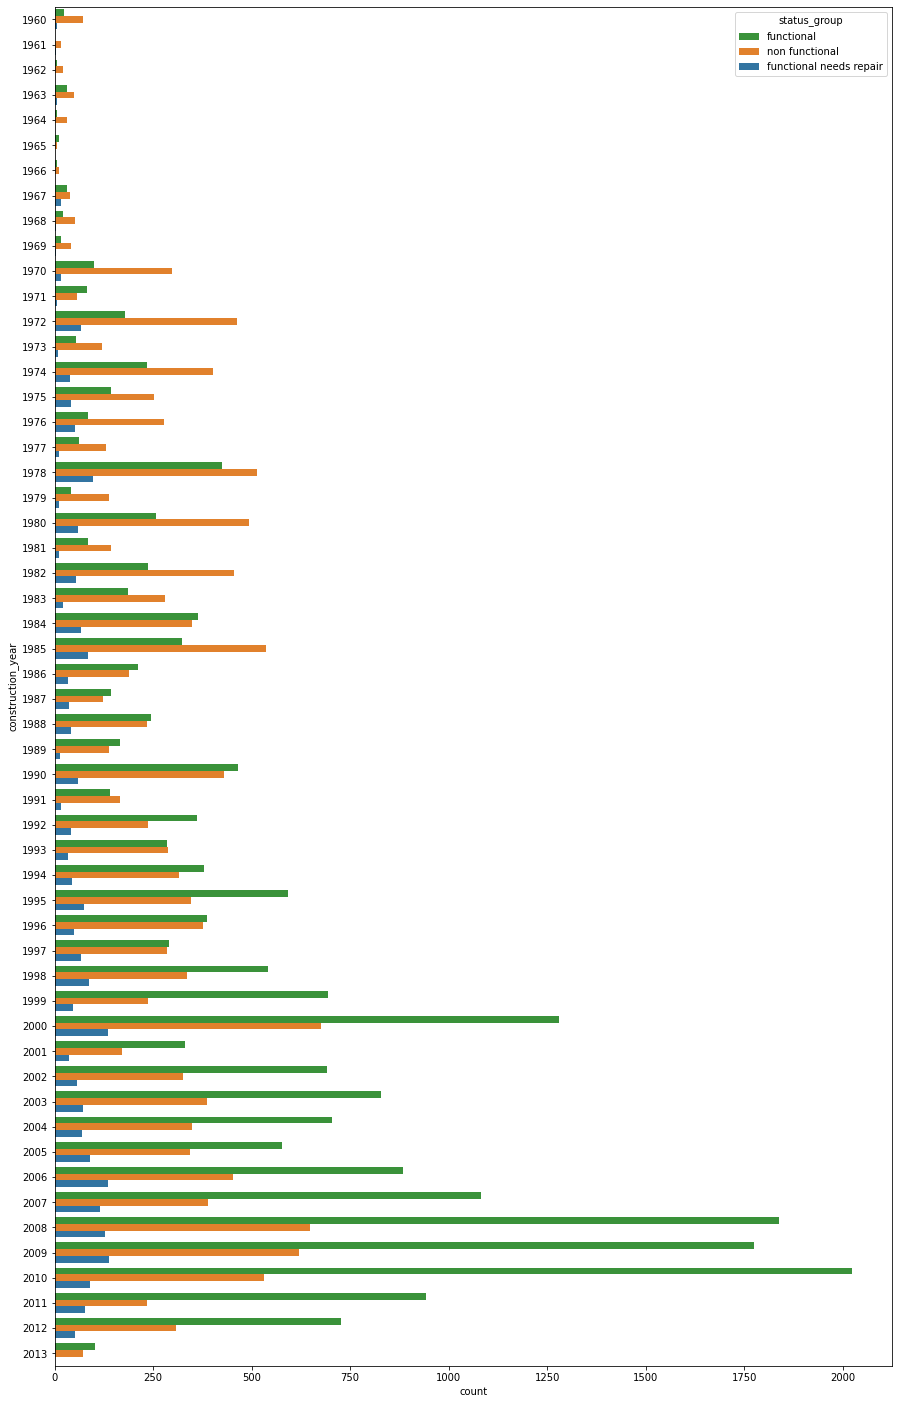

In [9]:
plt.figure(figsize=(15,25))
sns.countplot(y="construction_year", hue="status_group", data=X_y[-(X_y.construction_year == 0)])

#### `funder`

It is reasonable to assume that the `funder` could affect the sate of the pumps because some funders may promptly pay for repairs while other may delay or not pay at all.

However according to the inspection done on categorical columns, there are 1897 unique values for funder. Therefore considering all funders is not possible. Threfore we'll consider the top 10 funders only 

<AxesSubplot:xlabel='count', ylabel='funder'>

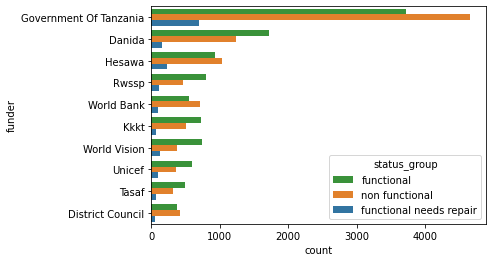

In [10]:
sns.countplot(y="funder", hue="status_group", data=X_y, order=X_y.funder.value_counts().iloc[:10].index)

It is evident that out of the pumps funded by Govt. of Tanzania, Hesawa, World Bank, and, Distric councils, majority are non functional.

In [11]:
sorted(X_y.funder.astype(str).unique(), key=str.lower)[:100]

['0',
 'A/co Germany',
 'Aar',
 'Abas Ka',
 'Abasia',
 'Abc-ihushi Development Cent',
 'Abd',
 'Abdala',
 'Abddwe',
 'Abdul',
 'Abood',
 'Abs',
 'Aco/germany',
 'Acord',
 'Acord Ngo',
 'Acra',
 'Act',
 'Act Mara',
 'Action Aid',
 'Action Contre La Faim',
 'Action In A',
 'Adap',
 'Adb',
 'Adf',
 'Adp',
 'Adp Bungu',
 'Adp Mombo',
 'Adp/w',
 'Adra',
 'Af',
 'Afdp',
 'Afric',
 'Africa',
 'Africa 2000 Network/undp',
 'Africa Amini Alama',
 'Africa Project Ev Germany',
 'African',
 'African 2000 Network',
 'African Barrick Gold',
 'African Development Bank',
 'African Development Foundation',
 'African Muslim Agency',
 'African Realief Committe Of Ku',
 'African Reflections Foundation',
 'African Relie',
 'Africaone Ltd',
 'Africare',
 'Afriican Reli',
 'Afroz Ismail',
 'Afya Department Lindi Rural',
 'Agape Churc',
 'Agt Church',
 'Ahmadia',
 'Ai',
 'Aic',
 'Aic Church',
 'Aic Kij',
 'Aict',
 'Aimgold',
 'Aixos',
 'Alia',
 'Ambwene Mwaikek',
 'Amref',
 'Amrefe',
 'Anglican Church',
 'Angr

It is clear from inspection that some of the unique values are caused due to spelling errors and data entry errors (eg: 'African Relie' most likely an errorneous entry for 'African Realief Committe Of Ku')

#### `installer`

`installer` is also highly likely to affect the state of the pumps due to the change of quality of installation amognst different installers. 

In this case also, there are 2145 unique values. We'll consider the top 10 installers only.

<AxesSubplot:xlabel='count', ylabel='installer'>

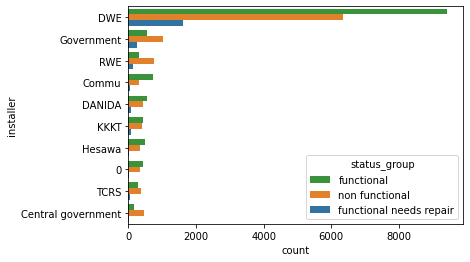

In [12]:
sns.countplot(y="installer", hue="status_group", data=X_y, order=X_y.installer.value_counts().iloc[:10].index)

A majority of the pumps installed by Gvernment, RWE, TCRS, and, Central Government are non functional. 

(0 indicates missing values)

In [13]:
sorted(X_y.installer.astype(str).unique(), key=str.lower)[:100]

['-',
 '0',
 'A.D.B',
 'AAR',
 'Aartisa',
 'ABASIA',
 'ABD',
 'ABDALA',
 'Abdallah Ally Wazir',
 'ABDUL',
 'AC',
 'Accra',
 'ACORD',
 'ACRA',
 'ACT',
 'ACT MARA',
 'ACTION AID',
 'Action Aid',
 'Action Contre La Faim',
 'Action Contre la Faim',
 'Active KMK',
 'Active MKM',
 'ACTIVE TANK CO',
 'ACTIVE TANK CO LTD',
 'AD',
 'Adam',
 'Adam Kea',
 'Adam mualuaka',
 'ADAP',
 'ADB',
 'ADP',
 'ADP Busangi',
 'Adra',
 'ADRA',
 'Adra /Community',
 'ADRA /Government',
 'Adra/ Community',
 'Adra/Community',
 'ADRA/Government',
 'Adrs',
 'AF',
 'Af',
 'Africa',
 'AFRICA',
 'Africa Amini Alama',
 'Africa Islamic Agency Tanzania',
 'Africa M',
 'AFRICA MUSLIM',
 'Africa Muslim Agenc',
 'AFRICAN DEVELOPMENT FOUNDATION',
 'African Muslims Age',
 'African Realief Committe of Ku',
 'AFRICAN REFLECTIONS FOUNDATION',
 'Africaone',
 'Africaone Ltd',
 'Africare',
 'Afroz Ismail',
 'AGRICAN',
 'Ahmad',
 'AI',
 'AIC',
 'AIC KI',
 'AICT',
 'AIMGOLD',
 'AIXOS',
 'Al Ha',
 'Alex moyela',
 'ALIA',
 'ALLYS',
 'Al

Similar to funder, It is clear from inspection that some of the unique values are caused due to spelling errors and data entry errors (eg: 'Action Contre La Faim' and 'Action Contre la Faim' are the same installer)

#### `basin`

On the argument that basin can affect water purity which then can affect the lifespan of a pump, we can think that `basin` can also correlate with functional status of a pump.   

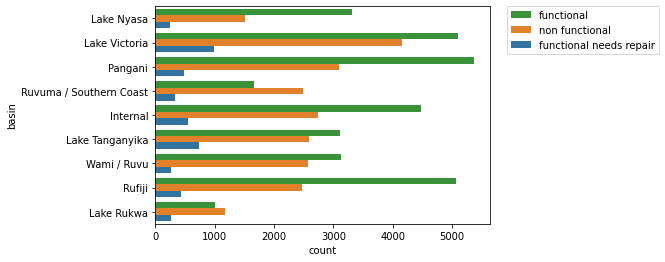

In [14]:
sns.countplot(y="basin", hue="status_group", data=X_y)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

A majority of the pumps which belong to Rawuma and Lake Rukwa are non functional. 

#### `quality_group`

Using an argument similar to that of `basin`, we can assume `quality_group` also might affect the operational status of a pump.

<AxesSubplot:xlabel='count', ylabel='quality_group'>

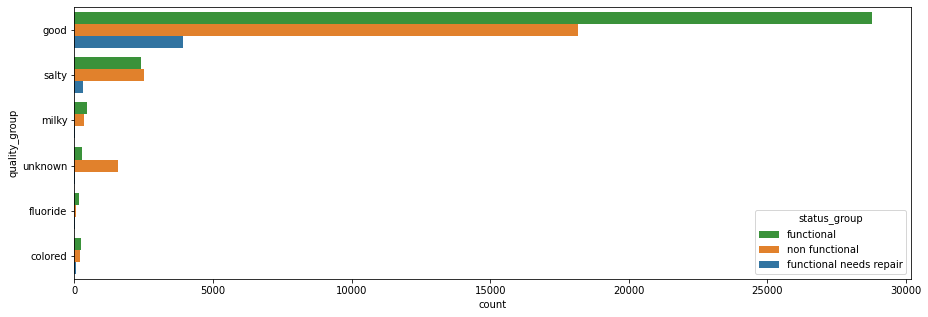

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(y="quality_group", hue="status_group", data=X_y)

A larger portion of pumps in unknown `quality_ group` are non functional. Majority out of the pumps belong to salty `quality_group` are also non functional.

#### `quantity_group`

Similar to quality, the amout of water available to the pumps, i.e `quantity_group` may also affect the status of a pump.

<AxesSubplot:xlabel='count', ylabel='quantity_group'>

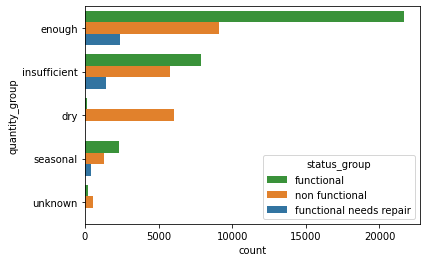

In [16]:
sns.countplot(y="quantity_group", hue="status_group", data=X_y)

It is clear that almost all the pumps in dry condition are non functional. A significant majority of pumps with unknown `quality_group` are also non-functional.

### Identifying Similar and Correlated Features

#### Features related to the Geographical location

`gps_height`, `longitude`, `latitude`, `subvillage`, `region`, `region_code`, `district_code`, `lga`, and `ward` are all related to the geographical location of the waterpoint. 

<AxesSubplot:>

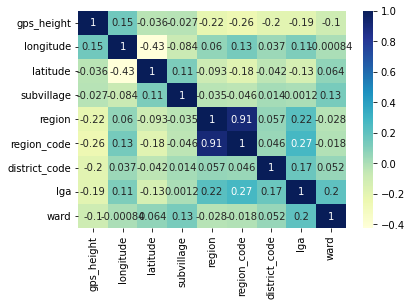

In [17]:
num_geographic_features = ['gps_height', 
                       'longitude', 
                       'latitude']

cat_geographic_features = ['subvillage', 
                       'region', 
                       'region_code', 
                       'district_code',
                       'lga',
                       'ward']

num_geo_X = X[num_geographic_features]
cat_geo_X = X[cat_geographic_features].apply(lambda x: x.factorize()[0]) # get numeric representation of categorical values

geo_X = num_geo_X.merge(cat_geo_X, left_index=True, right_index=True)

sns.heatmap(geo_X.corr(), cmap="YlGnBu", annot=True)

As expected, some features show strong coorelation. Especially features like `region` and `region_code` (unsuprisingly). 
However, there are some correlerations that are not accurately captured in the heatmap as well. For a given region, the (latitude, logitude) pairs that belong to the same region should be close together. But it is not captured that well here because we have not considered ranges for latitudes and longitudes. 

We'll further explore the numerical geographical feature to investigate about outliers.

<AxesSubplot:xlabel='gps_height'>

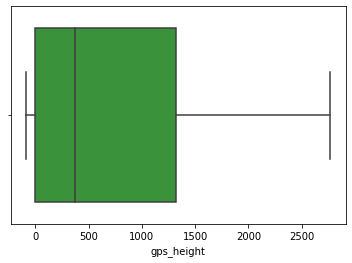

In [35]:
sns.boxplot(x=X['gps_height'])

<AxesSubplot:xlabel='longitude'>

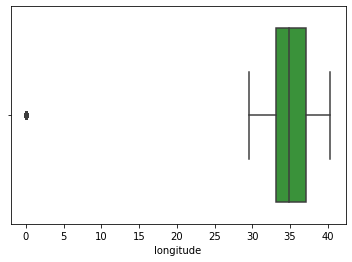

In [36]:
sns.boxplot(x=X['longitude'])

<AxesSubplot:xlabel='latitude'>

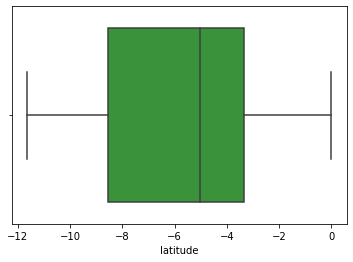

In [37]:
sns.boxplot(x=X['latitude'])

#### Features related to Operation and Management

`scheme_management`, `scheme_name`, `management`, and `management_group` are related to operation and management of the waterpoint. 

<AxesSubplot:>

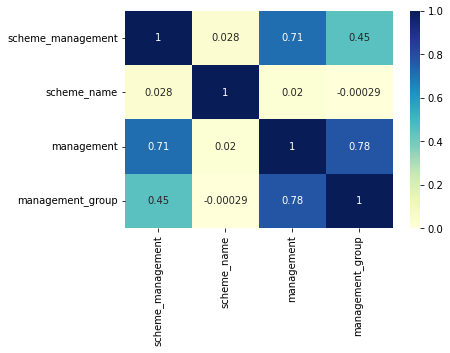

In [18]:
op_mgmt_features = ['scheme_management', 
                       'scheme_name', 
                       'management', 
                       'management_group']

op_mgmt_X = X[op_mgmt_features].apply(lambda x: x.factorize()[0]) # get numeric representation of categorical values

sns.heatmap(op_mgmt_X.corr(), cmap="YlGnBu", annot=True)

As it can be seen, `scheme_management` and `management_group` are closely correlated with `management`.

#### Features related to Extraction Type

`extraction_type`, `extraction_type_group`, and `extraction_type_class` are related to extraction type.

<AxesSubplot:>

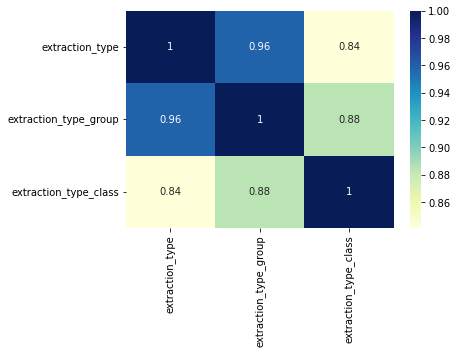

In [19]:
extr_features = ['extraction_type', 
                       'extraction_type_group', 
                       'extraction_type_class']

extr_X = X[extr_features].apply(lambda x: x.factorize()[0]) # get numeric representation of categorical values

sns.heatmap(extr_X.corr(), cmap="YlGnBu", annot=True)

As it can be seen, `extraction_type` and `extraction_type_class` are very closely correlated with `extraction_type_group`.

#### Features related to Cost

`payment`, and `payment_type` are related to what the water costs.

<AxesSubplot:>

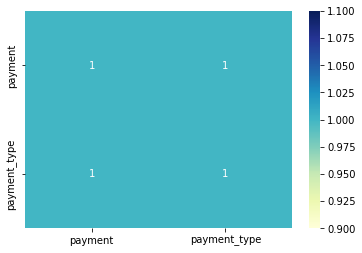

In [20]:
cost_features = ['payment', 
                       'payment_type']

cost_X = X[cost_features].apply(lambda x: x.factorize()[0]) # get numeric representation of categorical values

sns.heatmap(cost_X.corr(), cmap="YlGnBu", annot=True)

Based on the correlation, it appears that `payment` is duplicated as `payment_type`. To further confirm that the infomation is duplicated, we'll inspect the corresponding columns in the original dataset.

In [21]:
X[['payment', 'payment_type']].head(20)

,payment,payment_type
0,pay annually,annually
1,never pay,never pay
2,pay per bucket,per bucket
3,never pay,never pay
4,never pay,never pay
5,pay per bucket,per bucket
6,never pay,never pay
7,unknown,unknown
8,never pay,never pay
9,never pay,never pay


It is evident that the same exact information is replicated in the 2 columns with the only difference being the name used for some categories. For example, the category 'pay per bucket' under `payment` is listed as 'per bucket' under `payment_type`. 

#### Features related to Quality

`water_quality`, and `quality_group` are related to the quality of water.

<AxesSubplot:>

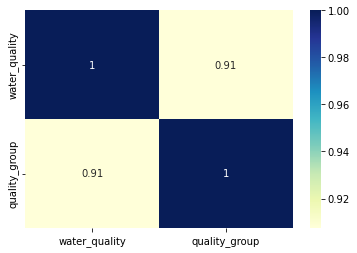

In [22]:
qual_features = ['water_quality', 
                       'quality_group']

qual_X = X[qual_features].apply(lambda x: x.factorize()[0]) # get numeric representation of categorical values

sns.heatmap(qual_X.corr(), cmap="YlGnBu", annot=True)

The 2 features are again extremly correlated.

<AxesSubplot:xlabel='count', ylabel='water_quality'>

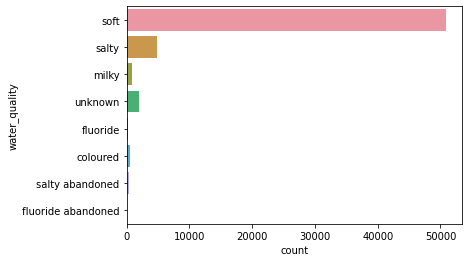

In [23]:
sns.countplot(y="water_quality", data=X)

<AxesSubplot:xlabel='count', ylabel='quality_group'>

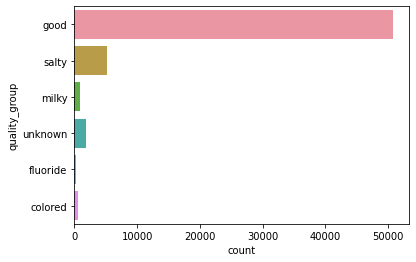

In [24]:
sns.countplot(y="quality_group", data=X)

It can be seen that `water_quality`, and `quality_group` contains identical information except that in `water_quality`, 'salty' and 'fluoride' have additional subcategories to differentiate between abandoned and non-abandoned. 

#### Features related to Quantity

`quantity`, and `quantity_group` are related to the quantity of water.

<AxesSubplot:>

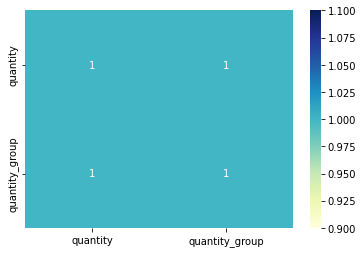

In [25]:
quan_features = ['quantity', 
                       'quantity_group']

quan_X = X[quan_features].apply(lambda x: x.factorize()[0]) # get numeric representation of categorical values

sns.heatmap(quan_X.corr(), cmap="YlGnBu", annot=True)

Based on the correlation, it appears that `quantity` is duplicated as `quantity_group`. To further confirm that the infomation is duplicated, we'll inspect the corresponding columns in the original dataset.

In [26]:
X[['quantity', 'quantity_group']].head(20)

,quantity,quantity_group
0,enough,enough
1,insufficient,insufficient
2,enough,enough
3,dry,dry
4,seasonal,seasonal
5,enough,enough
6,enough,enough
7,enough,enough
8,seasonal,seasonal
9,enough,enough


In [27]:
X['quantity'].equals(X['quantity_group'])

True

The 2 columns are exact duplicates of each other.

#### Features related to Source

`source`, `source_type`, and `source_class` are related to the source of the water.

<AxesSubplot:>

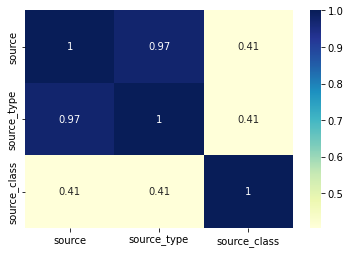

In [28]:
source_features = ['source', 
                       'source_type', 
                       'source_class']

source_X = X[source_features].apply(lambda x: x.factorize()[0]) # get numeric representation of categorical values

sns.heatmap(source_X.corr(), cmap="YlGnBu", annot=True)

The `source` and `source_type` are extremly correlated. However `source_class` does not seem to be that closely correlated.

<AxesSubplot:xlabel='count', ylabel='source'>

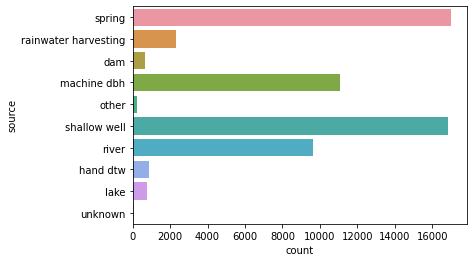

In [29]:
sns.countplot(y="source", data=X)

<AxesSubplot:xlabel='count', ylabel='source_type'>

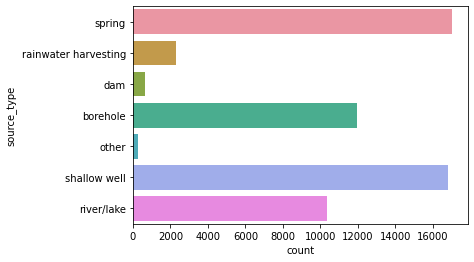

In [30]:
sns.countplot(y="source_type", data=X)

It seems that `source` is a slightly more granular classification than `source_type`. 

#### Features related to Waterpoint Type

`waterpoint_type` and `waterpoint_type_group` are related to the type of waterpoint.

<AxesSubplot:>

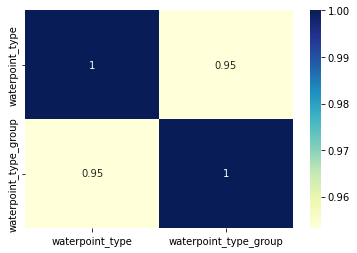

In [31]:
type_features = ['waterpoint_type', 
                       'waterpoint_type_group']

type_X = X[type_features].apply(lambda x: x.factorize()[0]) # get numeric representation of categorical values

sns.heatmap(type_X.corr(), cmap="YlGnBu", annot=True)

The 2 features are again extremly correlated.

<AxesSubplot:xlabel='count', ylabel='waterpoint_type'>

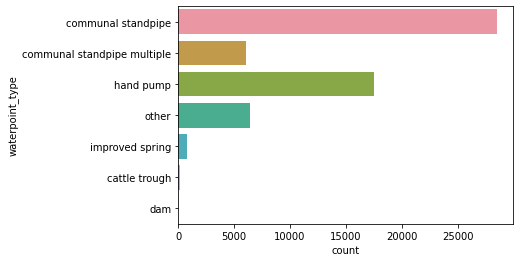

In [32]:
sns.countplot(y="waterpoint_type", data=X)

<AxesSubplot:xlabel='count', ylabel='waterpoint_type_group'>

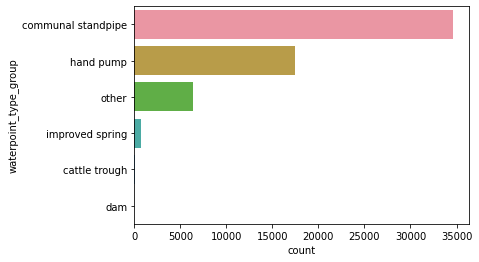

In [33]:
sns.countplot(y="waterpoint_type_group", data=X)

It appears that in `waterpoint_type`, 'communal standpipe' is classified into 2 sub categories as 'communal standpipe' and 'communal standpipe multiple'